In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [2]:
data = pd.read_csv('credit_train.csv')
test = pd.read_csv('credit_test.csv')

In [41]:
model2 = sm.ols(formula = 'Balance~Income+ Rating+Limit+ Cards', data = data).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     551.7
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          1.49e-135
Time:                        13:55:32   Log-Likelihood:                -1955.6
No. Observations:                 300   AIC:                             3921.
Df Residuals:                     295   BIC:                             3940.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -467.8591     37.245    -12.562      0.000    -541.159    -394.560
Income        -7.5478      0.456    -16.557      0.000      -8.445      -6.651
Rating         1.7730      0.931      1.904      0.058      -0.059       3.605
Limit          0.1451      0.062      2.331      0.020       0.023       0.268
Cards          7.0045      8.250      0.849      0.397      -9.231      23.240
==============================================================================
Omnibus:                       68.629   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.170
Skew:                           1.327   Prob(JB):                     2.66e-25
Kurtosis:                       4.420   Cond. No.                     2.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model = sm.ols(formula = 'Balance~Income*Student+Student+Limit*Student+ Cards', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1171.
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          1.86e-201
Time:                        13:11:53   Log-Likelihood:                -1793.6
No. Observations:                 300   AIC:                             3601.
Df Residuals:                     293   BIC:                             3627.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -475.2163     17.586    -27.023      0.000    -509.827    -440.606
Student[T.Yes]          233.9423     42.168      5.548      0.000     150.952     316.933
Income                   -7.1440      0.290    -24.635      0.000      -7.715      -6.573
Income:Student[T.Yes]    -3.0021      0.735     -4.082      0.000      -4.449      -1.555
Limit                     0.2558      0.004     60.094      0.000       0.247       0.264
Limit:Student[T.Yes]      0.0705      0.013      5.616      0.000       0.046       0.095
Cards                    23.4276      4.067      5.760      0.000      15.423      31.432
==============================================================================
Omnibus:                        9.673   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.163
Skew:                           0.445   Prob(JB):                      0.00621
Kurtosis:                       2.856   Cond. No.                     4.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
model.params['Limit:Student[T.Yes]']*100+model.params['Limit']*100

32.631012464448645

In [30]:
df = pd.DataFrame([[5000,30,10,'Yes'],[5000,30,10,'No'] ], columns=['Limit', 'Income','Cards', 'Student'])
print(model.predict(df)[0]-model.predict(df)[1])

496.4374407556279


In [45]:
test.loc[test.Student == 'Yes',:]
test.loc[test.Student == 'No',:]

pred_price = model.predict(test["Balance"]]

# (np.abs(test.price - pred_price)).mean()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
1,104.593,7075,514,4,71,11,No,No,No,West,580
2,148.924,9504,681,3,36,11,Yes,No,No,West,964
3,71.408,7114,512,2,87,9,No,No,No,West,872
4,20.089,2525,200,3,57,15,Yes,No,Yes,East,0
5,17.700,2860,235,4,63,16,Yes,No,No,West,89
...,...,...,...,...,...,...,...,...,...,...,...
95,19.253,3683,287,4,57,10,No,No,No,East,371
96,37.878,6827,482,2,80,13,Yes,No,No,South,1129
97,17.316,1335,138,2,65,13,No,No,No,East,0
98,49.794,5758,410,4,40,8,No,No,No,South,734


NameError: name 'pred_price' is not defined

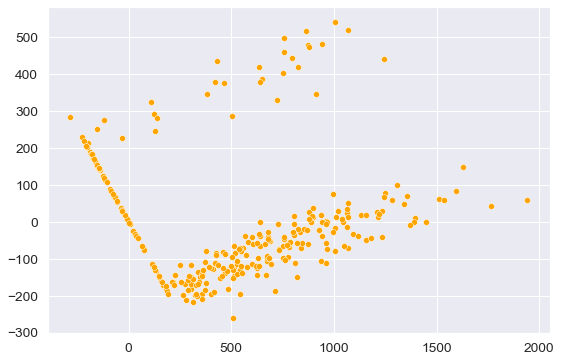

In [43]:
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model2.fittedvalues, y=model2.resid,color = 'orange')
sns.lineplot(x = [.min(),pred_price.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('${x:,.0f}')